In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cars = pd.read_csv('Car details v3.csv')
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
cars.shape
#(8128, 13)
cars.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [ ]:
cars['engine'] = cars['engine'].str.strip("CC")
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
cars['engine'] = cars['engine'].astype(float)

In [ ]:
# NUMERIC FEATURES
cars.describe()

,year,selling_price,km_driven,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3604.000000,14.000000


In [ ]:
# CONVERT MILEAGE OBJECT INTO FLOAT VALUE
cars['mileage'] = cars['mileage'].str.strip("kmpl")

In [ ]:
cars['mileage'] = cars['mileage'].str.strip("km/kg")

In [ ]:
cars['mileage'] = cars['mileage'].astype(float)

In [ ]:
cars.describe()

,year,selling_price,km_driven,mileage,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


Minimum SP: 29999
Maximum SP: 10000000


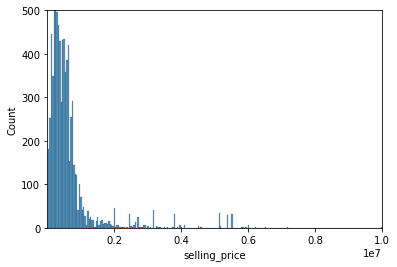

In [ ]:
# 1. HISTOGRAM - sns.histplot()
fig, ax = plt.subplots()
sns.histplot(x='selling_price', data=cars)
print("Minimum SP:",cars['selling_price'].min())
print("Maximum SP:",cars['selling_price'].max())
ax.set_xlim(10000, 10000000)
ax.set_ylim(0, 500)

plt.show()

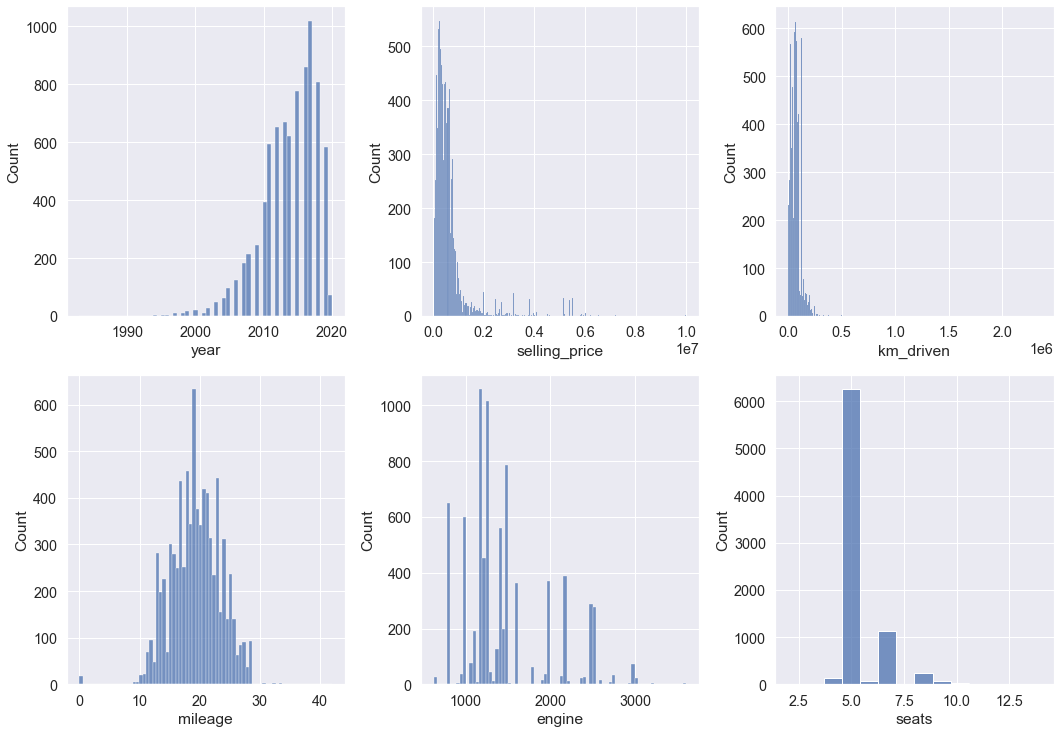

In [ ]:
cols = 3
rows = 3
num_cols = cars.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.histplot(x = cars[col], ax = ax)

fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

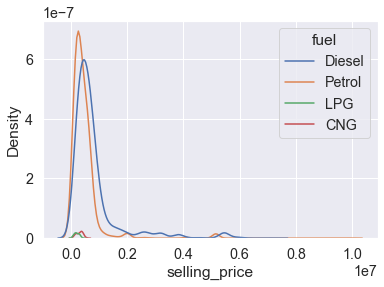

In [ ]:
# 2. KDE PLOT - Kernal Density Plot - sns.kdeplot()
sns.kdeplot(x='selling_price', data=cars, hue='fuel')

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

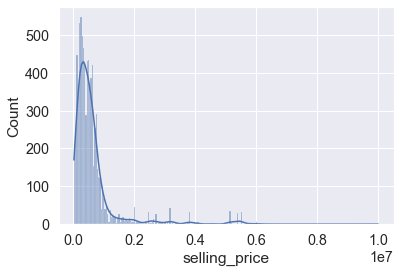

In [ ]:
# with histogram - sns.histplot(kde=TRUE)
sns.histplot(x='selling_price', data=cars, kde=True)

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

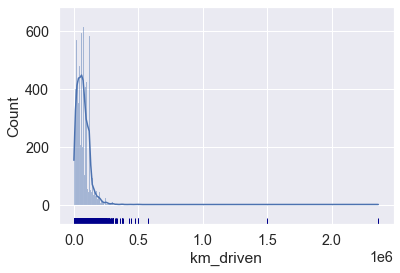

In [ ]:
# 3. RUG PLOT - sns.rugplot()
sns.rugplot(x='km_driven', data=cars, height=.03, color='darkblue')
sns.histplot(x='km_driven', data=cars, kde=True)

<AxesSubplot:xlabel='km_driven'>

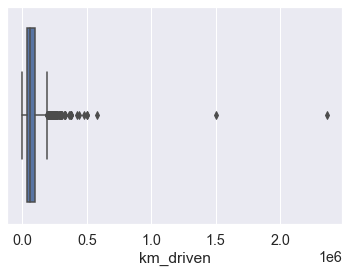

In [ ]:
# 4. BOX PLOTS - sns.boxplot()
sns.boxplot(x=cars['km_driven'])

<AxesSubplot:>

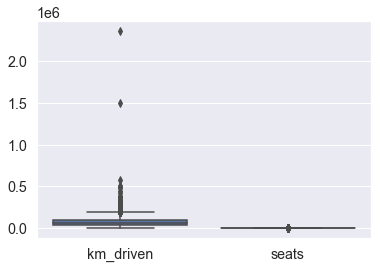

In [ ]:
sns.boxplot(data=cars.loc[:, ['km_driven', 'seats']])

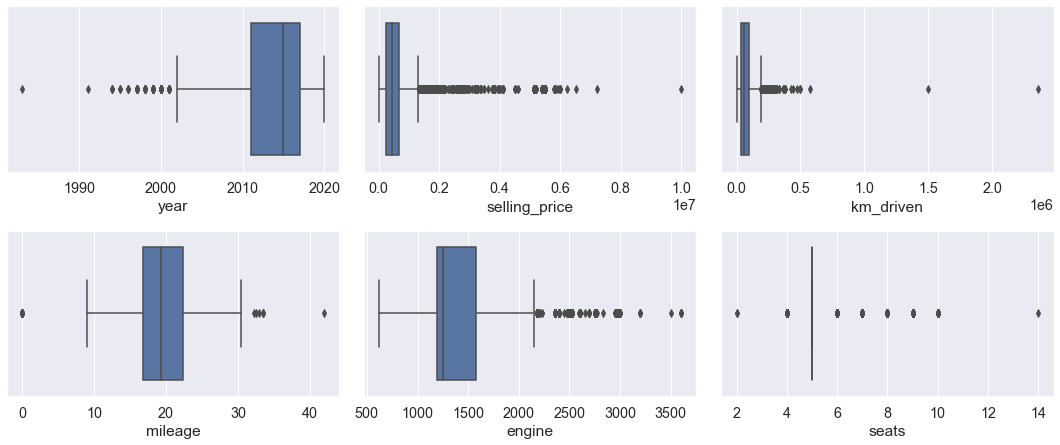

In [ ]:
cols = 3
rows = 3
num_cols = cars.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):

    ax=fig.add_subplot( rows, cols, i+1)

    sns.boxplot(x=cars[col], ax=ax)

fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='year'>

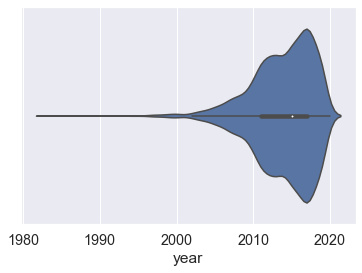

In [ ]:
# 5. VIOLINE PLOT - box and kernel
sns.violinplot(x=cars["year"])

<AxesSubplot:xlabel='selling_price'>

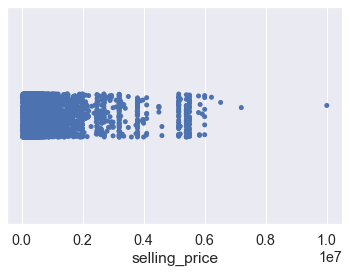

In [ ]:
# 6. STRIP PLOT
sns.stripplot(x=cars["sellin"])

In [ ]:
# CATEGORICAL FEATURES
cars.describe(include='object')

,name,fuel,seller_type,transmission,owner,max_power,torque,mielage
count,8128,8128,8128,8128,8128,7913,7906,7907
unique,2058,4,3,2,5,322,441,393
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,74,190Nm@ 2000rpm,18.9
freq,129,4402,6766,7078,5289,377,530,225


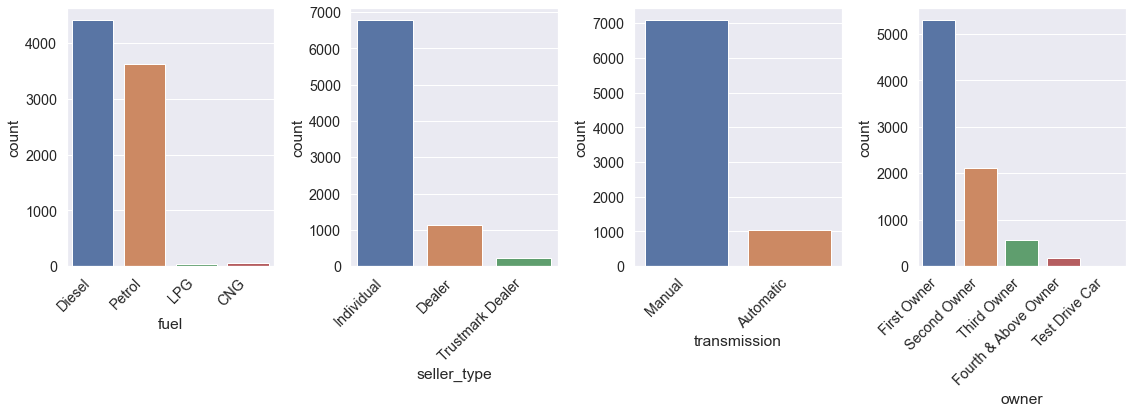

In [ ]:
# 1. COUNT PLOT
cols = 4
rows = 1
fig = plt.figure(figsize= (16,6))
all_categs = cars.select_dtypes(include='object')
cat_cols = all_categs.columns[all_categs.nunique() < 10]
for i, col in enumerate(cat_cols):

    ax=fig.add_subplot(rows, cols, i+1)

    sns.countplot(x=cars[col], ax=ax)

    plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show()

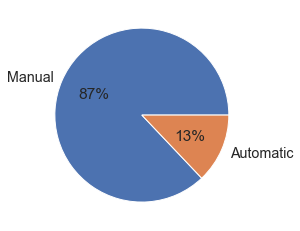

In [ ]:
# 2. PIE CHART
df = cars['transmission'].value_counts()
plt.pie(df, labels=df.index, autopct="%.0f%%");

In [ ]:
8
10
22
39
43
45
53
60
63
65
